#         Recommender system
##         Data contains 
###          943 Movie Users
###          1682 Movies
###          100000 ratings of movies
###           Given that each user has rated some item in the system, system will predict how the users would 
###            rate items that they have not watched yet. 
###            Used data from https://grouplens.org/datasets/movielens/

In [252]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

In [3]:
#Reading Users data
user_cols = ['user_id','age','sex','occupation','zip_code']
users = pd.read_csv('u.user',sep = '|',names =user_cols,encoding='latin-1')

In [4]:
users.shape

(943, 5)

In [5]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
#Reading ratings data:
rating_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('u.data', sep='\t', names=rating_cols,encoding='latin-1')

In [7]:
ratings.shape

(100000, 4)

In [8]:
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [9]:
#Reading movies file:
movie_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('u.item', sep='|', names=movie_cols, encoding='latin-1')

In [10]:
movies.shape

(1682, 24)

In [11]:
movies.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## convert csv file into pandas Dataframe

In [1342]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_train = pd.read_csv('ua.base', sep='\t', names=r_cols, encoding='latin-1')
ratings_test = pd.read_csv('ua.test', sep='\t', names=r_cols, encoding='latin-1')

In [1710]:
ratings_test.shape

(9430, 4)

In [1669]:
r_cols1 = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_train1 = pd.read_csv('u1.base', sep='\t', names=r_cols1, encoding='latin-1')
ratings_test1 = pd.read_csv('u1.test', sep='\t', names=r_cols1, encoding='latin-1')

In [1670]:
r_cols2 = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_train2 = pd.read_csv('u2.base', sep='\t', names=r_cols2, encoding='latin-1')
ratings_test2 = pd.read_csv('u2.test', sep='\t', names=r_cols2, encoding='latin-1')

In [1671]:
r_cols3 = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_train3 = pd.read_csv('u3.base', sep='\t', names=r_cols3, encoding='latin-1')
ratings_test3 = pd.read_csv('u3.test', sep='\t', names=r_cols3, encoding='latin-1')

In [1672]:
r_cols4 = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_train4 = pd.read_csv('u4.base', sep='\t', names=r_cols4, encoding='latin-1')
ratings_test4 = pd.read_csv('u4.test', sep='\t', names=r_cols4, encoding='latin-1')

In [1673]:
#r_cols5 = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
#ratings_train5 = pd.read_csv('u5.base', sep='\t', names=r_cols, encoding='latin-1')
#ratings_test5 = pd.read_csv('u5.test', sep='\t', names=r_cols, encoding='latin-1')

## """Convert pandas dataframe trainging rating to numpy training matrix rating"""

In [1674]:
R_train = np.array(ratings_train.pivot(index = 'user_id', columns = 'movie_id',values = 'rating').fillna(0))
R_test = np.array(ratings_test.pivot(index = 'user_id', columns = 'movie_id',values = 'rating').fillna(0))

In [1675]:
R_train1 = np.array(ratings_train1.pivot(index = 'user_id',columns = 'movie_id',values = 'rating').fillna(0))
R_test1 = np.array(ratings_test1.pivot(index = 'user_id', columns = 'movie_id',values = 'rating').fillna(0))


In [1676]:
R_train2 = np.array(ratings_train2.pivot(index = 'user_id', columns = 'movie_id',values = 'rating').fillna(0))
R_test2 = np.array(ratings_test2.pivot(index = 'user_id', columns = 'movie_id',values = 'rating').fillna(0))

In [1677]:
R_train3 = np.array(ratings_train3.pivot(index = 'user_id', columns = 'movie_id',values = 'rating').fillna(0))
R_test3 = np.array(ratings_test3.pivot(index = 'user_id', columns = 'movie_id',values = 'rating').fillna(0))

In [1678]:
R_train4 = np.array(ratings_train4.pivot(index = 'user_id', columns = 'movie_id',values = 'rating').fillna(0))
R_test4 = np.array(ratings_test4.pivot(index = 'user_id', columns = 'movie_id',values = 'rating').fillna(0))

In [1679]:
#R_train5 = np.array(ratings_train5.pivot(index = 'user_id', columns = 'movie_id',values = 'rating').fillna(0))
#R_test5 = np.array(ratings_test5.pivot(index = 'user_id', columns = 'movie_id',values = 'rating').fillna(0))

In [1681]:
R_train2.shape

(943, 1650)

#####################

In [1356]:
#ratings_train.ix[:10,:]

In [1357]:
t_data = pd.DataFrame(R_train)
t_data.to_csv("test3/R_data.csv")

In [1682]:
class Recommender():
    def __init__(self,rating,test_rating,features,learning_rate,momentum):
        self.rating= rating
        self.test_rating = test_rating
        self.num_users = len(rating)
        self.num_movies = len(rating[1])
        self.num_features = features
        self.learning_rate = learning_rate
        self.momentum = momentum
        #self.iterations = iterations
        
        #Take the rating of the movies given by user which are not zeros
        self.training_samples = [(i,j,self.rating[i,j])
                        for i in range(self.num_users)
                        for j in range(self.num_movies)
                          if self.rating[i,j]>0]
        self.test_samples = [(i,j,self.test_rating[i,j])
                        for i in range(len(self.test_rating))
                        for j in range(len(self.test_rating[1]))
                          if self.test_rating[i,j]>0]
        
    def data_for_initialization(self):
        """Returns the mean and stadard deviation for the initialization of
            features matrices"""
        sum_of_data = 0
        length = len(self.training_samples)
        for i in range(length):
            sum_of_data += self.training_samples[i][2]
        data_mean = sum_of_data/length
        #init_mean is squart root of mean of the data divided by num of features in feature_matrices
        init_mean = math.sqrt((data_mean/self.num_features))
        init_sdev = math.sqrt((2/self.num_features))
        return init_mean,init_sdev
        
    def initialize_fetures_matrix(self):
        """Initialized features matrices with mean and variance"""
        i_mean, st_dev = self.data_for_initialization()
        self.user_features = np.random.normal(loc = i_mean,scale = st_dev,size =(self.num_users,self.num_features))
        self.movie_features = np.random.normal(loc = i_mean,scale = st_dev,size = (self.num_features,self.num_movies))
        #self.movie_features = np.random.randn(self.num_features,self.num_movies)*np.sqrt(2/self.num_features)
        
        
        #To Update the User features and Movie features with MOMENTUM
        self.previous_changed_user_features = np.zeros((self.num_features,self.num_movies))
        self.previous_changed_movie_features = np.zeros((self.num_users,self.num_features))
    
    def initialize_feat_from_pretrained_file(self,user_feature,movie_feature):
        """Initialized the movie features and user features from previous trained
            Model"""
        self.user_features = user_feature
        self.movie_features = movie_feature
        
    
    def predict_full_matrix(self):
        """Returns the predictated full matrix using user features and movie
            features"""
        predicted_rating = np.matmul(self.user_features,self.movie_features)
        return predicted_rating
    
    def predict_rating(self,user_row,movie_col):
        """Returns the predictated rating of the position referenced by user_row and movie_column"""
        rating = 0
        for i in range(self.num_features):
            rating += self.user_features[user_row][i]*self.movie_features[i][movie_col]
        return rating
    
    def error(self,i,j):
        """Returns the difference between actual rating and predicted rating"""
        predicted_rating = self.predict_rating(i,j)
        #print("predicted rating",predicted_rating)
        actual_rating = self.rating[i][j]
        #print("actual rating",actual_rating)
        return (actual_rating-predicted_rating)
    
    def validation_error(self,i,j):
        """Returns difference between predicted rating and evaluation rating"""
        predicted_rating = self.predict_rating(i,j)
        evaluation_rating = self.test_rating[i,j]
        return (abs(evaluation_rating - predicted_rating))
    
    def stochastic_user_gradient(self,user_row,movie_col):
        """Calculate the gradient of the user features and Update the user features"""
        error = self.error(user_row,movie_col)
        #print("error",error)
        #print(type(error))
        for i in range(self.num_features):
            self.user_features[user_row][i] = (self.user_features[user_row][i] \
                                               + self.learning_rate*error*self.movie_features[i][movie_col]\
                                               - self.momentum* self.previous_changed_user_features[i][movie_col])
            self.previous_changed_user_features[i][movie_col] = self.learning_rate*error*self.movie_features[i][movie_col]
    
    def stochastic_movie_gradient(self,user_row,movie_col):
        """Calculate the gradient of the movie features and Update the movie features"""
        error = self.error(user_row,movie_col)
        for i in range(self.num_features):
            self.movie_features[i][movie_col] = (self.movie_features[i][movie_col] \
                                                 + self.learning_rate*error*self.user_features[user_row][i] \
                                               - self.momentum* self.previous_changed_movie_features[user_row][i])
            self.previous_changed_movie_features[user_row][i] = self.learning_rate*error*self.user_features[user_row][i]
    
    
    def train(self):
        """Train the model for given number of iteration """
        for itn in range(self.iterations):
            for row,col,r in self.training_samples:
                self.stochastic_user_gradient(row,col)
                self.stochastic_movie_gradient(row,col)
                
    def train_using_evaluation(self):
        """Train the Model until validation error starts to increase and training mean error
            reaches to certain thresold.
            Returns number of times validation error increases
                    number of iterations model has been trained
                    list of training mean errors
                    list of validation mean errors"""
        list_of_training_error = []
        list_of_validation_error = []
        
        count = 0
        num_of_iterations = 0
        validation_mean_error = 0
        training_mean_error = 0
        #list_of_training_error.append(training_mean_error)
        #list_of_validation_error.append(validation_mean_error)
        training_length = len(self.training_samples)
        test_length = len(self.test_samples)
        
        while(count<10):
            np.random.shuffle(self.training_samples)
            training_error = 0
            for row,col,r in self.training_samples:
                self.stochastic_user_gradient(row,col)
                self.stochastic_movie_gradient(row,col)
                training_error += abs(r-self.predict_rating(row,col))
            training_mean_error = (training_error/training_length)
            list_of_training_error.append(training_mean_error)

            pre_validation_mean_error = validation_mean_error
            validation_error = 0
            for row,col,r in self.test_samples:
                validation_error += abs(r - self.predict_rating(row,col))
            validation_mean_error = (validation_error/test_length)
            list_of_validation_error.append(validation_mean_error)
            if(pre_validation_mean_error < validation_mean_error):
                count += 1
            num_of_iterations += 1
        return (count,num_of_iterations,list_of_training_error,list_of_validation_error)
        
    def get_user_features(self):
        """Returns the User features matrix
               It can be used later for the initialization purpose for the same User
               features matrix. It helps to save a lot of computation power """
        return (self.user_features)

    
    def get_movie_features(self):
        """Returns the movie features matrix
               It can be used later for the initialization purpose for the same movie
                features matrix. It helps to save a lot of computation power """
        return self.movie_features
    def get_test_samples(self):
        """Return list of tuples which contain rating and its coordinate
            corresponding to User Id and Movie Id"""
        return (self.test_samples)

In [1769]:
#Constructor for the Recommender system
#Rating,features,learning_rate,momentum,iterations
rm = Recommender(R_train,R_test,100,0.001,0)

In [ ]:
"""Load User features and Movie features"""
file_user_data = pd.read_csv("user_features_data.csv")
new_user_features = file_user_data.as_matrix()        

In [1770]:
#Initilize the features matrices, User features and Movie features
rm.initialize_fetures_matrix()
print("Num of users ", rm.num_users)
print("Num of movies", rm.num_movies)
print("Num of latent features", rm.num_features)
print("Learning rate",rm.learning_rate)

Num of users  943
Num of movies 1680
Num of latent features 100
Learning rate 0.001


# Model initialization for ensemble

In [1683]:
#Constructor for the Model1
#Rating,features,learning_rate,momentum,iterations
rm1 = Recommender(R_train1,R_test1,100,0.001,0.6)
#Initilize the features matrices, User features and Movie features for Model 1
rm1.initialize_fetures_matrix()

In [1684]:
#Constructor for the Model2
#Rating,features,learning_rate,momentum,iterations
rm2 = Recommender(R_train2,R_test2,100,0.001,0.1)
#Initilize the features matrices, User features and Movie features for Model 2
rm2.initialize_fetures_matrix()

In [1756]:
### Constructor for the Model3
#Rating,features,learning_rate,momentum,iterations
rm3 = Recommender(R_train3,R_test3,100,0.001,0.4)
#Initilize the features matrices, User features and Movie features for Model 3
rm3.initialize_fetures_matrix()

In [1757]:
#Constructor for the Model4
#Rating,features,learning_rate,momentum,iterations
rm4 = Recommender(R_train4,R_test4,100,0.001,0.4)
#Initilize the features matrices, User features and Movie features for Model 4
rm4.initialize_fetures_matrix()

In [1687]:
#Constructor for the Model5
#Rating,features,learning_rate,momentum,iterations
##rm5 = Recommender(R_train5,R_test5,100,0.001,0.6)
#Initilize the features matrices, User features and Movie features for Model 5
##rm5.initialize_fetures_matrix()

# Model training for ensemble

In [1771]:
count,num_of_iterations,list_of_training_error,list_of_validation_error = rm.train_using_evaluation()

In [1688]:
count1,num_of_iterations1,list_of_training_error1,list_of_validation_error1 = rm1.train_using_evaluation()

In [1689]:
count2,num_of_iterations2,list_of_training_error2,list_of_validation_error2 = rm2.train_using_evaluation()

In [1758]:
count3,num_of_iterations3,list_of_training_error3,list_of_validation_error3 = rm3.train_using_evaluation()

In [1759]:
count4,num_of_iterations4,list_of_training_error4,list_of_validation_error4 = rm4.train_using_evaluation()

In [1749]:
#count5,num_of_iterations5,list_of_training_error5,list_of_validation_error5 = rm5.train_using_evaluation()

In [1750]:
print(num_of_iterations)
print(count)
print(rm.learning_rate)

14
10
0.001


# Display the evaluation and training error

In [1772]:
list_of_iteration = []
for i in range(num_of_iterations):
    list_of_iteration.append(i)

In [1761]:
list_of_iteration1 = []
for i in range(num_of_iterations1):
    list_of_iteration1.append(i)

list_of_iteration2 = []
for i in range(num_of_iterations2):
    list_of_iteration2.append(i)

list_of_iteration3 = []
for i in range(num_of_iterations3):
    list_of_iteration3.append(i)

list_of_iteration4 = []
for i in range(num_of_iterations4):
    list_of_iteration4.append(i)


In [1773]:
total_ev_error = sum(list_of_validation_error)/len(list_of_validation_error) 

total_ev_error1 = sum(list_of_validation_error1)/len(list_of_validation_error1) 
total_ev_error2 = sum(list_of_validation_error2)/len(list_of_validation_error2)
total_ev_error3 = sum(list_of_validation_error3)/len(list_of_validation_error3)
total_ev_error4 = sum(list_of_validation_error4)/len(list_of_validation_error4)

"""print(list_of_validation_error)
total = sum(list_of_validation_error)/len(list_of_validation_error)
print(total)"""

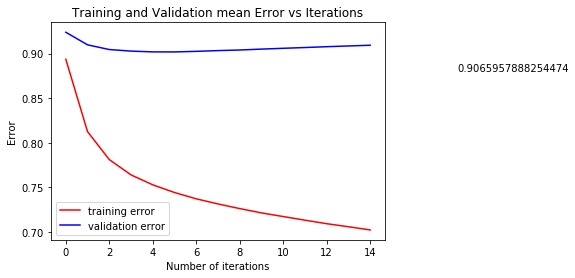

In [1774]:
plt.plot(list_of_iteration,list_of_training_error,'r',list_of_iteration,list_of_validation_error,'b')
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.title('Training and Validation mean Error vs Iterations')
plt.gca().legend(('training error','validation error'))
plt.text(18,0.88,total_ev_error)
plt.show()

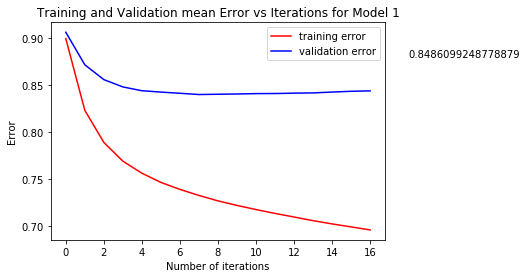

In [1695]:
plt.plot(list_of_iteration1,list_of_training_error1,'r',list_of_iteration1,list_of_validation_error1,'b')
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.title('Training and Validation mean Error vs Iterations for Model 1')
plt.gca().legend(('training error','validation error'))
plt.text(18,0.88,total_ev_error1)
plt.show()

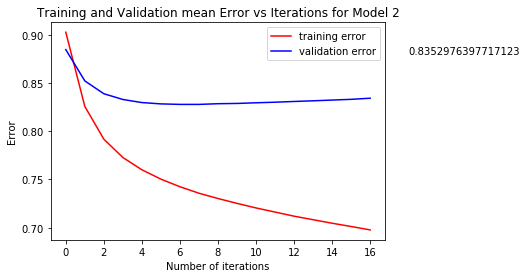

In [1697]:
plt.plot(list_of_iteration2,list_of_training_error2,'r',list_of_iteration2,list_of_validation_error2,'b')
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.title('Training and Validation mean Error vs Iterations for Model 2')
plt.gca().legend(('training error','validation error'))
plt.text(18,0.88,total_ev_error2)
plt.show()

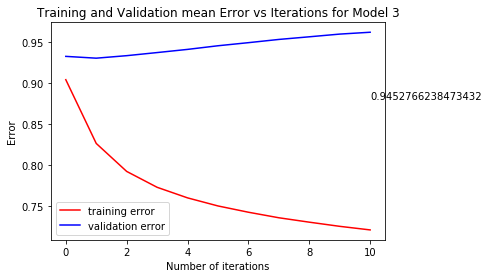

In [1763]:
plt.plot(list_of_iteration3,list_of_training_error3,'r',list_of_iteration3,list_of_validation_error3,'b')
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.title('Training and Validation mean Error vs Iterations for Model 3')
plt.gca().legend(('training error','validation error'))
plt.text(10,0.88,total_ev_error3)
plt.show()

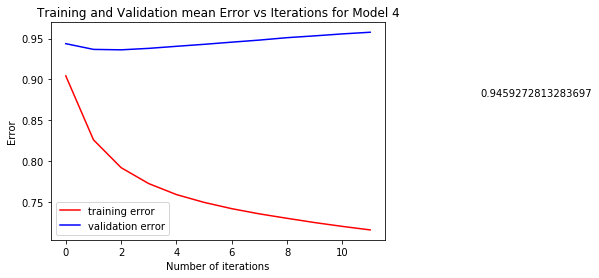

In [1764]:
plt.plot(list_of_iteration4,list_of_training_error4,'r',list_of_iteration4,list_of_validation_error4,'b')
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.title('Training and Validation mean Error vs Iterations for Model 4')
plt.gca().legend(('training error','validation error'))
plt.text(15,0.88,total_ev_error4)
plt.show()

# Get User features and Movie features for 4 Models

In [1700]:
user_features1 = rm1.get_user_features()
movie_features1 = rm1.get_movie_features()

user_features2 = rm2.get_user_features()
movie_features2 = rm2.get_movie_features()

user_features3 = rm3.get_user_features()
movie_features3 = rm3.get_movie_features()

user_features4 = rm4.get_user_features()
movie_features4 = rm4.get_movie_features()


# Save User features and Movie features for 4 Models

In [1701]:
user_feat_data1 = pd.DataFrame(user_features1)
user_feat_data1.to_csv("trained_data/trained1/user_features_data.csv",header = None, index=None)
movie_feat_data1 = pd.DataFrame(movie_features1)
movie_feat_data1.to_csv("trained_data/trained1/movie_features_data.csv",header=None,index=None)

user_feat_data2 = pd.DataFrame(user_features2)
user_feat_data2.to_csv("trained_data/trained2/user_features_data.csv",header = None, index=None)
movie_feat_data2 = pd.DataFrame(movie_features2)
movie_feat_data2.to_csv("trained_data/trained2/movie_features_data.csv",header=None,index=None)

user_feat_data3 = pd.DataFrame(user_features3)
user_feat_data3.to_csv("trained_data/trained3/user_features_data.csv",header = None, index=None)
movie_feat_data3 =pd.DataFrame(movie_features3)
movie_feat_data3.to_csv("trained_data/trained3/movie_features_data.csv",header=None,index=None)

user_feat_data4 = pd.DataFrame(user_features4)
user_feat_data4.to_csv("trained_data/trained4/user_features_data.csv",header = None, index=None)
movie_feat_data4 = pd.DataFrame(movie_features4)
movie_feat_data4.to_csv("trained_data/trained4/movie_features_data.csv",header=None,index=None)


# Load user features and movie features  from the csv file

In [1702]:
"""Load User features and Movie features from csv and convert into numpy matrix"""

"""user_data1 = pd.read_csv("trained_data/trained1/user_features_data.csv")
new_user_features1 = user_data1.as_matrix() 
movie_data1 = pd.read_csv("trained_data/trained1/movie_features_data.csv")
new_movie_features1 = movie_data1.as_matrix()

user_data2 = pd.read_csv("trained_data/trained2/user_features_data.csv")
new_user_features2 = user_data2.as_matrix() 
movie_data2 = pd.read_csv("trained_data/trained2/movie_features_data.csv")
new_movie_features2 = movie_data2.as_matrix()

user_data3 = pd.read_csv("trained_data/trained3/user_features_data.csv")
new_user_features3 = user_data3.as_matrix() 
movie_data3 = pd.read_csv("trained_data/trained3/movie_features_data.csv")
new_movie_features3 = movie_data3.as_matrix()

user_data4 = pd.read_csv("trained_data/trained4/user_features_data.csv")
new_user_features4 = user_data4.as_matrix() 
movie_data4 = pd.read_csv("trained_data/trained4/movie_features_data.csv")
new_movie_features4 = movie_data4.as_matrix()

user_data5 = pd.read_csv("trained_data/trained5/user_features_data.csv")
new_user_features5 = user_data5.as_matrix() 
movie_data5 = pd.read_csv("trained_data/trained5/movie_features_data.csv")
new_movie_features5 = movie_data5.as_matrix()"""



'user_data1 = pd.read_csv("trained_data/trained1/user_features_data.csv")\nnew_user_features1 = user_data1.as_matrix() \nmovie_data1 = pd.read_csv("trained_data/trained1/movie_features_data.csv")\nnew_movie_features1 = movie_data1.as_matrix()\n\nuser_data2 = pd.read_csv("trained_data/trained2/user_features_data.csv")\nnew_user_features2 = user_data2.as_matrix() \nmovie_data2 = pd.read_csv("trained_data/trained2/movie_features_data.csv")\nnew_movie_features2 = movie_data2.as_matrix()\n\nuser_data3 = pd.read_csv("trained_data/trained3/user_features_data.csv")\nnew_user_features3 = user_data3.as_matrix() \nmovie_data3 = pd.read_csv("trained_data/trained3/movie_features_data.csv")\nnew_movie_features3 = movie_data3.as_matrix()\n\nuser_data4 = pd.read_csv("trained_data/trained4/user_features_data.csv")\nnew_user_features4 = user_data4.as_matrix() \nmovie_data4 = pd.read_csv("trained_data/trained4/movie_features_data.csv")\nnew_movie_features4 = movie_data4.as_matrix()\n\nuser_data5 = pd.rea

# Build One model from Four models

In [1703]:
"""Average of user features and movie features"""
final_user_features = (user_features1 + user_features2 + user_features3 + user_features4)/4
final_movie_features = (movie_features1 + movie_features2 + movie_features3 + movie_features4)/4


# Predict final Rating

In [1704]:
final_prediction = np.matmul(final_user_features,final_movie_features)

In [1705]:
predicted_new

array([[4.1712617 , 3.42230996, 3.46455652, ..., 3.31785628, 3.00893989,
        3.67653794],
       [4.05599722, 3.4828617 , 3.15430905, ..., 3.26848033, 3.29654828,
        3.60031489],
       [3.38916564, 2.98047259, 2.51129748, ..., 3.05891139, 2.59478471,
        3.06422324],
       ...,
       [4.43797712, 3.64024225, 3.77981958, ..., 3.99244873, 3.73103081,
        3.95037144],
       [4.50454383, 3.87524603, 3.25799012, ..., 3.83214008, 3.98154132,
        3.86783945],
       [3.95507797, 3.38016644, 3.06990556, ..., 3.23456427, 3.03624816,
        3.47524   ]])

In [1706]:
final_prediction

array([[4.05509619, 3.36577841, 3.15549775, ..., 3.57293928, 3.63302159,
        3.34831009],
       [4.05778652, 3.5155221 , 3.36608615, ..., 3.65153087, 3.64461442,
        3.46588192],
       [3.36051495, 2.9404846 , 2.76589047, ..., 3.00754895, 3.07428358,
        2.862818  ],
       ...,
       [4.13477736, 3.47958878, 3.40234277, ..., 3.67709583, 3.768971  ,
        3.5790974 ],
       [4.40958017, 3.68757009, 3.5972183 , ..., 3.92127139, 4.00061187,
        3.70003457],
       [3.79013582, 3.35743678, 3.06242059, ..., 3.46528616, 3.4602782 ,
        3.13222541]])

In [1707]:
R_train

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

# Final Absolute Mean Evaluation Error

In [1731]:
final_prediction[0][4]

3.4458091566916895

In [1765]:
new_test_samples = [(i,j,R_test[i,j])
                        for i in range(len(R_test))
                        for j in range(len(R_test))
                          if R_test[i,j]>0]
"""With Ensemble"""       
test_error = 0
test_mean_error = 0
for row,col,r in new_test_samples:
    test_error += abs(r -final_prediction[row][col])
test_mean_error = (test_error/len(new_test_samples))
print("Test Mean Error Using Ensemble Model = ",test_mean_error)

###########################################################################################
"""Without Ensemble"""
test_error1 = 0
test_mean_error1 = 0
for row,col,r in new_test_samples:
    test_error1 += abs(r -predicted_new[row][col])
test_mean_error1 = (test_error1/len(new_test_samples))
print("Test Mean error with single Model = ",test_mean_error1)

        

Test Mean Error Using Ensemble Model =  0.8778874995757241
Test Mean error with single Model =  0.9067002149448486


In [1502]:
i = 445
r,c = test_samples[i][0],test_samples[i][1]
print("Actual",test_samples[i][2])
print("Ensemble Predicted",final_prediction[r][c])

r,c = test_samples[i][0],test_samples[i][1]
print("Actual",test_samples[i][2])
print("Old Predicted",predicted_new[r][c])

Actual 3.0
Ensemble Predicted 3.9807339201017453
Actual 3.0
Old Predicted 4.067662122795133


In [1503]:
test_samples = rm.get_test_samples()

# Evaluation Using T-test
## T-Test compare results obtained with two different methods A and B on the same sample, in order to confirm whether both methods provide similar analytical results or not.

In [1533]:
class Evaluation:
    """Evaluate  Recommender using T-test
        Real population is list of tupples in format(row,col,rating)
        Predicted population is two dimensional array"""
    def __init__(self,real_population,predicted_population,num_samples,conf_interval):
        self.real_population = real_population
        self.predicted_population = predicted_population
        self.num_samples = num_samples
        self.conf_interval = conf_interval
    
    def get_rating(self):
        """Returns list of two samples for the t test from 
            given population
            First sample is list of Actual rating
            Second sample is list of Predicted rating"""
        r_count = 0
        list_real_samples = []
        list_predicted_samples = []
        np.random.shuffle(self.real_population)
        for i in range(self.num_samples):
            r_sample = self.real_population[i]
            list_real_samples.append(r_sample[2])
            row = r_sample[0]
            col = r_sample[1]
            list_predicted_samples.append(self.predicted_population[row][col])
        return (list_real_samples,list_predicted_samples)
    
    def calculate_tvalue(self):
        """Calculate t value from two samples 
            i.e. Actual rating and Predicted rating
            Returns T-calculated value"""
        real_value, predicted_value = self.get_rating()
        mean1 = np.mean(real_value,dtype = np.float64)
        mean2 = np.mean(predicted_value, dtype = np.float64)
        std1 = np.std(real_value, dtype = np.float64)
        std2 = np.std(predicted_value, dtype = np.float64)
        n1 = len(real_value)
        n2 = len(predicted_value)
        t_value = (mean1 - mean2)/(math.sqrt(((std1**2)/n1 + (std2**2)/n2)))
        return t_value
    
    def calculate_critical_tvalue(self):
        """Calculate critical t value from the t-distribution table
            for a given alpha,confidence interval and degree of freedom
            Returns T-theoritical value"""
        degree_freedom = 2*(self.num_samples -1)
        #self.conf_interval should be the lower tail probability
        t_critical = stats.t.ppf(self.conf_interval,degree_freedom)  #stats.t.cdf
        return t_critical
    
    def define_hypothesis(self):
        """Determine whether the null Hypothesis is accepted or not"""
        cal_value = self.calculate_tvalue()
        cri_value = self.calculate_critical_tvalue()
        if(abs(cal_value)<abs(cri_value)):
            print("Null Hypothesis is accepted,\
            i.e. both actual ratings and predicted ratings provide the same analytical results.")
        else:
            print("Null Hypothesis is rejected,\
            i.e.actual ratings and predicted ratings provide different analytical results")


In [1534]:
ev = Evaluation(test_samples,final_prediction,60,0.05)

In [1535]:
ev.define_hypothesis()

Null Hypothesis is accepted,            i.e. both actual ratings and predicted ratings provide the same analytical results.


## Get movies that has not been watched by user 'N' form pool of all  movies

In [1536]:
def get_movie_to_recommend(actual_matrix,trained_matrix,user_num):
    """Extract movies, that has not been watched by User yet,
    from Pool of all movies"""
    user_num = user_num-1
    list_rec_movies = {}
    length = len(actual_matrix[user_num])
    for i in range(length):
        if actual_matrix[user_num][i] == 0:
            list_rec_movies[i] = trained_matrix[user_num][i]
    return list_rec_movies
            

### Last value of the constructor represent user number

In [1544]:
movies_not_watched = get_movie_to_recommend(R_train,predicted_new,10)

### Sort all movies that has not been watched by user N based on the rating predicted
### by Recommender system

In [1545]:
def sort_movie_rating(movies_list,num_ofmovies_torec):
    """Returns top N numbers of movies recommended to a particular User"""
    sorted_movies_rating = sorted(movies_list.items(),key = lambda movies_list: movies_list[1], reverse = True)
    movies_torecommend = []
    for i in range(num_ofmovies_torec):
        movies_torecommend.append(sorted_movies_rating[i])
    return movies_torecommend
        

In [1546]:
num_ofmovies_torec = 10
top_movies_to_recommend = sort_movie_rating(movies_not_watched,num_ofmovies_torec)


In [1547]:
movies.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [1548]:
all_movies_name = movies['movie title']

# Recommend Movies

In [1549]:
def final_recomendation(all_movies_name,top_movies_to_recommend,num_ofmovies_torec):
    rec_movies_name = []
    for i in range(num_ofmovies_torec):
        m_index = top_movies_to_recommend[i][0]
        rec_movies_name.append(all_movies_name[m_index])
        
    return rec_movies_name

In [1550]:
final_movie = final_recomendation(all_movies_name,top_movies_to_recommend,num_ofmovies_torec)

In [1551]:
final_movie

['Wrong Trousers, The (1993)',
 "Schindler's List (1993)",
 'Boot, Das (1981)',
 'Close Shave, A (1995)',
 'Wallace & Gromit: The Best of Aardman Animation (1996)',
 'Sunset Blvd. (1950)',
 'Raise the Red Lantern (1991)',
 'Empire Strikes Back, The (1980)',
 'Titanic (1997)',
 'As Good As It Gets (1997)']